In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"


In [ ]:
# we arechanging the working directory
%cd /content/drive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/drive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

utkface-new.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

crop_part1   ngrok			     photo.jpg	utkface_aligned_cropped
data.h5      ngrok-stable-linux-amd64.zip    pp.jpg	utkface-new.zip
kaggle.json  ngrok-stable-linux-amd64.zip.1  UTKFace


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip.

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327523.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170105164106036.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170105172720493.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170108224608753.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170109140259

In [ ]:
import numpy as np 
import pandas as pd 

import os

In [ ]:
# variable path will contain where our dataset is stored.

path = "/content/drive/My Drive/Kaggle/UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[5656])
#/content/drive/My Drive/Kaggle/UTKFace

Total samples: 23709
50_1_0_20170119205606664.jpg.chip.jpg


In [ ]:
# this code will take images one by one from files
# and resize in 64 by 64 dimentions. and also labels
# age and gender from image name.

import cv2
images = []
ages = []
genders = []

for file in files:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )


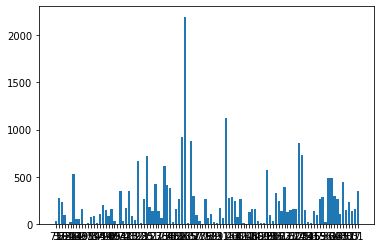

Max value: 99


In [ ]:
import matplotlib.pyplot as plt

x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(ages))

Gender: 1 Age: 8


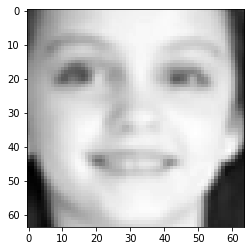

In [ ]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
    
idx = 500
sample = images[idx]
print("Gender:",genders[idx],"Age:",ages[idx])
display(sample)

In [ ]:
def age_group(age):
    
    if age >=0 and age <= 2:
        return 1
    elif age < 6:
        return 2
    elif age < 13:
        return 3
    elif age < 24:
        return 4
    elif age < 32:
        return 5
    elif age < 43:
        return 6
    elif age < 53:
        return 7
    else:
        return 8;     

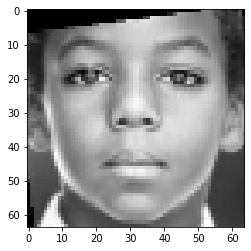

In [ ]:
# pre processing

target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 8
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
display(features[550])

In [ ]:
# we are using approx. 18970 images for training
# and approx. 4750 images for testing.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)

print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 18967
Samples in Testing: 4742


In [ ]:
print("Shape of image:",sample.shape)

Shape of image: (64, 64, 1)


In [ ]:
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

Using TensorFlow backend.


In [ ]:
inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='relu')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)

In [ ]:
model = Model(inputs=inputs, outputs=[age_model,gender_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 60, 60, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 30, 30, 64)   0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [ ]:
h = model.fit(x_train,[y_train[:,0],y_train[:,1]],validation_data=(x_test,[y_test[:,0],y_test[:,1]]),epochs = 32, batch_size=128,shuffle = True)

Train on 18967 samples, validate on 4742 samples
Epoch 1/32
18967/18967 [==============================] - 13s 659us/step - loss: 0.8119 - dense_4_loss: 0.1186 - dense_10_loss: 0.6931 - dense_4_accuracy: 0.1118 - dense_10_accuracy: 0.5090 - val_loss: 0.7169 - val_dense_4_loss: 0.0343 - val_dense_10_loss: 0.6831 - val_dense_4_accuracy: 0.1687 - val_dense_10_accuracy: 0.5272
Epoch 2/32
18967/18967 [==============================] - 5s 281us/step - loss: 0.6958 - dense_4_loss: 0.0591 - dense_10_loss: 0.6362 - dense_4_accuracy: 0.1579 - dense_10_accuracy: 0.6141 - val_loss: 0.5566 - val_dense_4_loss: 0.0336 - val_dense_10_loss: 0.5218 - val_dense_4_accuracy: 0.1651 - val_dense_10_accuracy: 0.8045
Epoch 3/32
18967/18967 [==============================] - 5s 282us/step - loss: 0.5939 - dense_4_loss: 0.0508 - dense_10_loss: 0.5432 - dense_4_accuracy: 0.1655 - dense_10_accuracy: 0.7839 - val_loss: 0.4775 - val_dense_4_loss: 0.0299 - val_dense_10_loss: 0.4455 - val_dense_4_accuracy: 0.1670 - va

In [ ]:
model.save('data.h5')

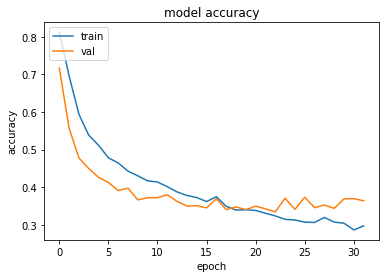

In [ ]:
history = h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

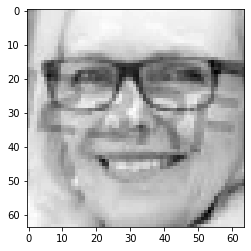

Actual Gender: Female Age: 50
Values: [array([[0.79034114]], dtype=float32), array([[0.69805074]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 48-53


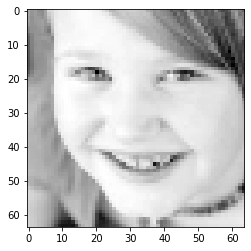

Actual Gender: Female Age: 8
Values: [array([[0.43634778]], dtype=float32), array([[0.8540623]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 8-13


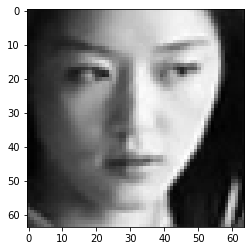

Actual Gender: Female Age: 28
Values: [array([[0.6047065]], dtype=float32), array([[0.8540623]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 25-32


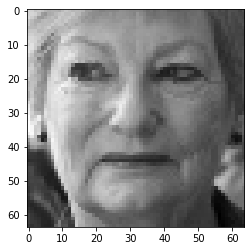

Actual Gender: Female Age: 83
Values: [array([[0.81019527]], dtype=float32), array([[0.8540623]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 60 +


In [ ]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
    
def age_group(age):

    if age >=0 and age <= 2:
        return 1
    elif age < 6:
        return 2
    elif age < 13:
        return 3
    elif age < 24:
        return 4
    elif age < 32:
        return 5
    elif age < 43:
        return 6
    elif age < 53:
        return 7
    else:
        return 8;

def get_age(distr):

    distr = distr*4
    # 0-2, 4-6, 8-13, 15-20, 25-32, 38-43, 48-53, 60

    if distr <= 0.2:return "0-2"
    if distr >= 0.2 and distr <= 0.9:return "4-6"
    if distr >= 0.9 and distr <= 1.9:return "8-13"
    if distr >= 1.9 and distr <= 2.25:return "15-24"
    if distr >= 2.25 and distr <= 2.5:return "25-32"
    if distr >= 2.5 and distr <= 2.9:return "38-43"
    if distr >= 2.9 and distr <= 3.2:return "48-53"
    if distr >= 3.2 and distr <= 4.4:return "60 +"
    
    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    val = model.predict( np.array([ sample ]) )    
    age = get_age(val[0])
    gender = get_gender(val[1])
    print("Values:",val,"\nPredicted Gender:",gender,"Predicted Age:",age)

indexes = [5656,519,15000,50]    
    


for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)

In [ ]:
import cv2 as cv

cv.namedWindow('hola', cv.WINDOW_NORMAL)

cap = cv.VideoCapture(0)
cap.set(cv.CAP_PROP_FRAME_WIDTH, 416)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, 416)
while cv.waitKey(1) < 0:
   
    # get frame from the video
    hasFrame, frame = cap.read()

    # Stop the program if reached end of video
    if not hasFrame:
        print("Done processing !!!\n")
        break

    # Create a 4D blob from a frame.
    blob = cv.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop=False)

    # Sets the input to the network
    net.setInput(blob)
         
    cv.imshow(winName, frame)
       
cv.destroyAllWindows()
cv.VideoCapture(0).release()

In [ ]:
#extra`

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
    
def age_group(age):

    if age >=0 and age <= 2:
        return 1
    elif age < 6:
        return 2
    elif age < 13:
        return 3
    elif age < 24:
        return 4
    elif age < 32:
        return 5
    elif age < 43:
        return 6
    elif age < 53:
        return 7
    else:
        return 8;

def get_age(distr):

    distr = distr*4
    # 0-2, 4-6, 8-13, 15-20, 25-32, 38-43, 48-53, 60

    if distr <= 0.2:return "0-2"
    if distr >= 0.2 and distr <= 0.9:return "4-6"
    if distr >= 0.9 and distr <= 1.9:return "8-13"
    if distr >= 1.9 and distr <= 2.25:return "15-24"
    if distr >= 2.25 and distr <= 2.5:return "25-32"
    if distr >= 2.5 and distr <= 2.9:return "38-43"
    if distr >= 2.9 and distr <= 3.2:return "48-53"
    if distr >= 3.2 and distr <= 4.4:return "60 +"
    
    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    val = model.predict( np.array([ sample ]) )    
    age = get_age(val[0])
    gender = get_gender(val[1])
    print("Values:",val,"\nPredicted Gender:",gender,"Predicted Age:",age)

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

image = cv2.imread("/content/photo.jpg",0)
image = cv2.resize(image,dsize=(64,64))
myself = image.reshape((image.shape[0],image.shape[1],1))
res = get_result(myself)
